# Penerapan Metode Ensemble untuk meningkatkan kinerja Algoritma Klasifikasi pada Imbalanced Dataset

| | Nama | NRP |
| --- | --- | --- |
| 1. | Helsa Nesta Dhaifullah | 5025201005 |
| 2. | Danial Farros Maulana | 5025201004 |
| 3. | Aiffah Kiysa Waafi | 5025201202 |
| 4. | Muhammad Afif Dwi Ardhiansyah | 5025201212 |
| 5. | Gloria Dyah Pramesti | 5025201033 |

## Import dataset ##

In [27]:
import pandas as pd
import numpy as np
df = pd.read_csv('Fitur_LBPuniform_Ikan.csv')

df.head()

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,...,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,cat_24,cat_25,category
0,9323,7670,3810,2313,1690,1450,1390,1744,1818,2246,...,2088,1870,2251,2286,3249,4540,6821,12954,104300,0
1,8820,7629,3669,2388,1623,1531,1343,1646,1785,2211,...,1909,1810,2111,2218,3125,4585,6945,12943,105986,0
2,13101,6905,5009,3260,2465,1954,1690,1602,1610,1676,...,1692,1725,2019,2310,3281,4908,6899,13322,111351,0
3,12866,6717,5054,3392,2559,1972,1826,1736,1708,1882,...,1769,1856,2091,2523,3399,4871,6825,13230,109851,0
4,8157,6292,2910,1899,1423,1301,1084,1453,1767,2447,...,2172,1586,1908,2458,3705,5406,5382,13690,95304,0


In [28]:
df.columns

Index(['cat_0', 'cat_1', 'cat_2', 'cat_3', 'cat_4', 'cat_5', 'cat_6', 'cat_7',
       'cat_8', 'cat_9', 'cat_10', 'cat_11', 'cat_12', 'cat_13', 'cat_14',
       'cat_15', 'cat_16', 'cat_17', 'cat_18', 'cat_19', 'cat_20', 'cat_21',
       'cat_22', 'cat_23', 'cat_24', 'cat_25', 'category'],
      dtype='object')

In [29]:
df["category"].value_counts()

7    577
5    564
6    544
0    500
4    331
3    252
1    240
2    240
Name: category, dtype: int64

## Modelling Selection

*   Adaboost
*   Adaboost + Normalisasi
*   Adaboost + Normalisasi + imbalanced Overfit

### 1. Adaboost

### x y partition ###

In [30]:
x = df.drop(['category'],axis=1)
y = df['category']
y

0       0
1       0
2       0
3       0
4       0
       ..
3243    7
3244    7
3245    7
3246    7
3247    7
Name: category, Length: 3248, dtype: int64

### Splitting DataSet ###

In [31]:
from sklearn.model_selection import train_test_split
x_train_ada, x_test_ada, y_train_ada, y_test_ada = train_test_split(x, y, train_size=0.8,random_state=1)
print("Input Training:",x.shape)
print("Input Training:",x_train_ada.shape)
print("Input Test:",x_test_ada.shape)
print("Output Training:",y_train_ada.shape)
print("Output Test:",y_test_ada.shape)

Input Training: (3248, 26)
Input Training: (2598, 26)
Input Test: (650, 26)
Output Training: (2598,)
Output Test: (650,)


### Adaboost

In [32]:
from sklearn.ensemble import AdaBoostClassifier
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)

ada_mod.fit(x_train_ada, y_train_ada)

x_adaptiveresult = ada_mod.predict_proba(x_test_ada)
x_adaptiveresult

array([[0.15975355, 0.07241733, 0.00958981, ..., 0.14675932, 0.14670291,
        0.15010377],
       [0.15691719, 0.14460951, 0.13513871, ..., 0.14074908, 0.14242612,
        0.14362121],
       [0.13442079, 0.146122  , 0.13631884, ..., 0.12884309, 0.132377  ,
        0.13785988],
       ...,
       [0.14636597, 0.06027012, 0.00744168, ..., 0.14717055, 0.14481282,
        0.14544028],
       [0.12323081, 0.09096467, 0.0875205 , ..., 0.13785853, 0.13790885,
        0.13935031],
       [0.13003815, 0.13996243, 0.14634144, ..., 0.13315268, 0.13518736,
        0.13548248]])

In [33]:
import numpy as np
x_adaptivetest = np.array(ada_mod.predict_proba(x_test_ada))
dataset_test = pd.DataFrame(x_adaptivetest, columns=x.columns[:8])
dataset_test

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7
0,0.159754,0.072417,0.009590,0.144885,0.169788,0.146759,0.146703,0.150104
1,0.156917,0.144610,0.135139,0.118532,0.018006,0.140749,0.142426,0.143621
2,0.134421,0.146122,0.136319,0.071697,0.112361,0.128843,0.132377,0.137860
3,0.163001,0.054822,0.052293,0.175421,0.141631,0.082407,0.164777,0.165648
4,0.130812,0.090072,0.110969,0.124330,0.125790,0.137270,0.140710,0.140047
...,...,...,...,...,...,...,...,...
645,0.136384,0.179467,0.163702,0.092131,0.025626,0.132467,0.133694,0.136527
646,0.144047,0.138025,0.141977,0.068065,0.096695,0.130520,0.139547,0.141124
647,0.146366,0.060270,0.007442,0.176805,0.171694,0.147171,0.144813,0.145440
648,0.123231,0.090965,0.087520,0.144399,0.138768,0.137859,0.137909,0.139350


In [34]:
x_adaptivetrain = np.array(ada_mod.predict_proba(x_train_ada))
dataset_train = pd.DataFrame(x_adaptivetrain, columns=x.columns[:8])
dataset_train

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7
0,0.109725,0.090432,0.114522,0.138600,0.129700,0.136681,0.141701,0.138639
1,0.139010,0.110770,0.133712,0.073902,0.106780,0.142641,0.146225,0.146960
2,0.153692,0.068315,0.007921,0.157719,0.176270,0.146247,0.143749,0.146089
3,0.130683,0.146666,0.168009,0.143703,0.018940,0.096666,0.146555,0.148778
4,0.138894,0.148492,0.010369,0.128042,0.156890,0.138639,0.137410,0.141263
...,...,...,...,...,...,...,...,...
2593,0.132811,0.150818,0.171065,0.142008,0.021867,0.078832,0.150211,0.152389
2594,0.117397,0.100526,0.135026,0.137285,0.093730,0.137095,0.141192,0.137749
2595,0.146882,0.061214,0.007406,0.176998,0.171839,0.146589,0.144119,0.144954
2596,0.139311,0.050502,0.050160,0.171799,0.149022,0.143797,0.148739,0.146670


### Gaussian Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(dataset_train, y_train_ada)
y_pred = nbtrain.predict(dataset_test)
print(classification_report(y_test_ada, y_pred))

              precision    recall  f1-score   support

           0       0.35      0.31      0.33       107
           1       0.66      0.55      0.60        49
           2       0.33      0.79      0.47        53
           3       0.11      0.21      0.14        57
           4       0.18      0.48      0.26        66
           5       0.51      0.17      0.26       109
           6       0.26      0.05      0.09        97
           7       0.21      0.08      0.12       112

    accuracy                           0.28       650
   macro avg       0.33      0.33      0.28       650
weighted avg       0.32      0.28      0.25       650



### SVM

In [36]:
from sklearn.metrics import classification_report
from sklearn import svm
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = svm.SVC()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(dataset_train, y_train_ada)
y_pred = nbtrain.predict(dataset_test)
print(classification_report(y_test_ada, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.76      0.56      0.65       107
           1       0.48      0.67      0.56        49
           2       0.32      0.47      0.38        53
           3       0.00      0.00      0.00        57
           4       0.27      0.38      0.31        66
           5       0.35      0.36      0.35       109
           6       0.25      0.49      0.33        97
           7       0.20      0.05      0.08       112

    accuracy                           0.36       650
   macro avg       0.33      0.37      0.33       650
weighted avg       0.35      0.36      0.34       650



### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = DecisionTreeClassifier(random_state=0)
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(dataset_train, y_train_ada)
y_pred = nbtrain.predict(dataset_test)
print(classification_report(y_test_ada, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.61      0.58       107
           1       0.61      0.61      0.61        49
           2       0.56      0.58      0.57        53
           3       0.26      0.28      0.27        57
           4       0.27      0.20      0.23        66
           5       0.38      0.38      0.38       109
           6       0.41      0.52      0.46        97
           7       0.28      0.22      0.25       112

    accuracy                           0.42       650
   macro avg       0.42      0.42      0.42       650
weighted avg       0.41      0.42      0.41       650



### KNN

In [75]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score  
from sklearn.neighbors import KNeighborsClassifier

for i in range (1,100) :
    # Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
    modelnb = KNeighborsClassifier(n_neighbors=i)
    # Memasukkan data training pada fungsi klasifikasi Naive Bayes
    nbtrain = modelnb.fit(dataset_train, y_train_ada)
    y_pred = nbtrain.predict(dataset_test)
    print(str(i) + " neighbors accuracy : " + str(accuracy_score(y_test_ada, y_pred)))

1 neighbors accuracy : 0.4307692307692308
2 neighbors accuracy : 0.41384615384615386
3 neighbors accuracy : 0.4276923076923077
4 neighbors accuracy : 0.45076923076923076
5 neighbors accuracy : 0.43846153846153846
6 neighbors accuracy : 0.44769230769230767
7 neighbors accuracy : 0.4276923076923077
8 neighbors accuracy : 0.4307692307692308
9 neighbors accuracy : 0.4107692307692308
10 neighbors accuracy : 0.42923076923076925
11 neighbors accuracy : 0.4169230769230769
12 neighbors accuracy : 0.4169230769230769
13 neighbors accuracy : 0.4246153846153846
14 neighbors accuracy : 0.4169230769230769
15 neighbors accuracy : 0.42153846153846153
16 neighbors accuracy : 0.42
17 neighbors accuracy : 0.42153846153846153
18 neighbors accuracy : 0.4153846153846154
19 neighbors accuracy : 0.4307692307692308
20 neighbors accuracy : 0.43846153846153846
21 neighbors accuracy : 0.4323076923076923
22 neighbors accuracy : 0.41846153846153844
23 neighbors accuracy : 0.4169230769230769
24 neighbors accuracy : 0

In [39]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = KNeighborsClassifier(n_neighbors=4)
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(dataset_train, y_train_ada)
y_pred = nbtrain.predict(dataset_test)
print(str(i) + " neighbors accuracy : " + str(accuracy_score(y_test_ada, y_pred)))

19 neighbors accuracy : 0.45076923076923076


### ANN

In [40]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units=10,kernel_initializer='uniform' , activation='tanh' , input_dim=8))
classifier.add(Dense(units=6,kernel_initializer='uniform' , activation='tanh'))
classifier.add(Dense(units=1 , kernel_initializer='uniform' , activation='sigmoid'))
classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
classifier.fit(dataset_train, y_train_ada, batch_size = 50, epochs = 100)

Epoch 1/100
52/52 [==============================] - 1s 2ms/step - loss: 0.5277 - accuracy: 0.0735
Epoch 2/100
52/52 [==============================] - 0s 2ms/step - loss: -0.4888 - accuracy: 0.0735
Epoch 3/100
52/52 [==============================] - 0s 2ms/step - loss: -2.9012 - accuracy: 0.0735
Epoch 4/100
52/52 [==============================] - 0s 2ms/step - loss: -5.3349 - accuracy: 0.0735
Epoch 5/100
52/52 [==============================] - 0s 2ms/step - loss: -7.1876 - accuracy: 0.0735
Epoch 6/100
52/52 [==============================] - 0s 2ms/step - loss: -8.7378 - accuracy: 0.0735
Epoch 7/100
52/52 [==============================] - 0s 2ms/step - loss: -10.1398 - accuracy: 0.0735
Epoch 8/100
52/52 [==============================] - 0s 2ms/step - loss: -11.4596 - accuracy: 0.0735
Epoch 9/100
52/52 [==============================] - 0s 2ms/step - loss: -12.7269 - accuracy: 0.0735
Epoch 10/100
52/52 [==============================] - 0s 2ms/step - loss: -13.9623 - accuracy: 0.0

In [41]:
# Defining a function for finding best hyperparameters
def FunctionFindBestParams(x_train, y_train):
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 20, 25]
    epoch_list=[25, 50, 100]
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
 
            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=10,kernel_initializer='uniform' , activation='tanh' , input_dim=8))
            classifier.add(Dense(units=6,kernel_initializer='uniform' , activation='tanh'))
            classifier.add(Dense(units=1 , kernel_initializer='uniform' , activation='sigmoid'))
            classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
            survivalANN_Model=classifier.fit(x_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            Accuracy = survivalANN_Model.history['accuracy'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)

In [42]:
# Calling the function
# ResultsData = FunctionFindBestParams(dataset_train, y_train_ada)

In [43]:
from sklearn.metrics import classification_report

y_pred = classifier.predict(dataset_test)
y_pred = (y_pred > 0.5)

print(classification_report(y_test_ada, y_pred, zero_division=0))

21/21 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       107
           1       0.08      1.00      0.14        49
           2       0.00      0.00      0.00        53
           3       0.00      0.00      0.00        57
           4       0.00      0.00      0.00        66
           5       0.00      0.00      0.00       109
           6       0.00      0.00      0.00        97
           7       0.00      0.00      0.00       112

    accuracy                           0.08       650
   macro avg       0.01      0.12      0.02       650
weighted avg       0.01      0.08      0.01       650



### 2. Adaboost + Normalisasi

### Preprocessing ##

#### check missing value ###

In [44]:
print("check null = ",  df.isnull().sum().sum())

check null =  0


#### data visualization ### 

In [76]:

# # Pair-wise Scatter Plots
# import seaborn as sns
# cols = ["cat_0","cat_1","cat_2","cat_3","cat_4","cat_5","cat_6","cat_7","cat_8","cat_9","cat_10","cat_11","cat_12","cat_13","cat_14","cat_15","cat_16","cat_17","cat_18","cat_19","cat_20","cat_21","cat_22","cat_23","cat_24","cat_25","category"]
# pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
#                   plot_kws=dict(edgecolor="k", linewidth=0.5),
#                   diag_kind="kde", diag_kws=dict(shade=True))

# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

#### fixing outlier ###

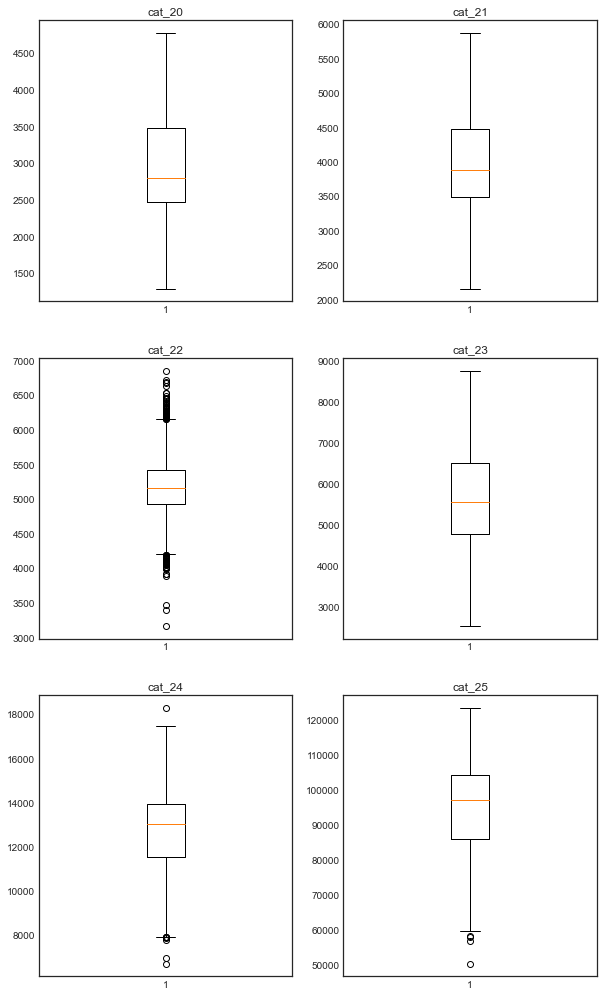

In [46]:
cols = ["cat_0","cat_1","cat_2","cat_3","cat_4","cat_5","cat_6","cat_7","cat_8","cat_9","cat_10","cat_11","cat_12","cat_13","cat_14","cat_15","cat_16","cat_17","cat_18","cat_19","cat_20","cat_21","cat_22","cat_23","cat_24","cat_25","category"]

import matplotlib.pyplot as plt
plt.figure(figsize = (10, 30))
plt.style.use('seaborn-white')

for x in range (20,26):
    index = x%10
    ax=plt.subplot(5,2,index+1) 
    plt.boxplot(df[cols[x]])
    ax.set_title(cols[x])

In [47]:
dfFixOutliers = df

outlierframe =['cat_9','cat_10','cat_11','cat_12','cat_12','cat_13','cat_17','cat_18','cat_19','cat_22','cat_24','cat_25']
for cols in outlierframe :
    Q1 = dfFixOutliers[cols].quantile(0.25)
    Q3 = dfFixOutliers[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (dfFixOutliers[cols] >= Q1 - 1.5 * IQR) & (dfFixOutliers[cols] <= Q3 + 1.5 *IQR)
    dfFixOutliers=dfFixOutliers.loc[filter]

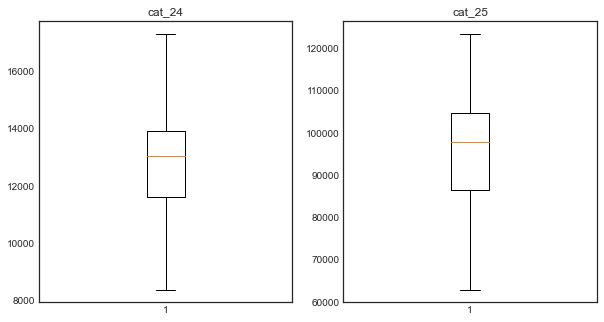

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 30))
plt.style.use('seaborn-white')

# for x in range (0,10): 
for x in range (10,12): 
    index = x%10
    ax=plt.subplot(5,2,index+1)
    plt.boxplot(dfFixOutliers[outlierframe[x]])
    ax.set_title(outlierframe[x])
    

#### Normalize Data ###

In [49]:
from sklearn.preprocessing import StandardScaler
d_pre = dfFixOutliers
variable_cat2 = ["cat_0","cat_1","cat_2","cat_3","cat_4","cat_5","cat_6","cat_7","cat_8","cat_9","cat_10","cat_11","cat_12","cat_13","cat_14","cat_15","cat_16","cat_17","cat_18","cat_19","cat_20","cat_21","cat_22","cat_23","cat_24","cat_25"]
d_pre[variable_cat2] = StandardScaler().fit_transform(d_pre[variable_cat2])
d_pre

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7,cat_8,cat_9,...,cat_17,cat_18,cat_19,cat_20,cat_21,cat_22,cat_23,cat_24,cat_25,category
0,-0.980142,1.557762,-1.134152,-1.482144,-1.273575,-1.194822,-0.996246,-0.673919,-0.730094,-0.576136,...,-0.558060,-0.601064,-0.431706,-0.982956,-1.157560,-1.799805,1.076145,0.039481,0.679935,0
1,-1.248937,1.522809,-1.345525,-1.393379,-1.349129,-1.095365,-1.055516,-0.800330,-0.770404,-0.613393,...,-0.824485,-0.690527,-0.640220,-1.080771,-1.363526,-1.673845,1.192847,0.032540,0.817749,0
2,1.038764,0.905593,0.663269,-0.361342,-0.399633,-0.575981,-0.617926,-0.857086,-0.984167,-1.182897,...,-1.147469,-0.817265,-0.777244,-0.948433,-1.104407,-0.769732,1.149554,0.271705,1.256284,0
3,0.913184,0.745321,0.730728,-0.205116,-0.293632,-0.553879,-0.446421,-0.684238,-0.864460,-0.963612,...,-1.032862,-0.621939,-0.670008,-0.642041,-0.908407,-0.873299,1.079910,0.213649,1.133674,0
4,-1.603234,0.383004,-2.483341,-1.972125,-1.574663,-1.377773,-1.382133,-1.049283,-0.792391,-0.362173,...,-0.433034,-1.024520,-0.942566,-0.735541,-0.400136,0.624224,-0.278157,0.503928,-0.055398,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,-0.114973,0.770044,-0.506029,-0.414601,-0.551868,-0.616500,-0.728900,-0.808070,-0.901105,-0.924225,...,-0.663737,-0.902255,-0.716179,-0.876510,-0.278882,0.923729,0.838037,1.911783,0.786115,7
3244,-0.046037,0.910708,0.170065,-0.154225,-0.506761,-0.741742,-0.836090,-0.920292,-0.925535,-0.960418,...,-0.802159,-0.841122,-0.826394,-0.585941,-0.212441,1.575922,1.038500,1.403794,0.785380,7
3245,-0.769594,-0.278543,-0.798353,-0.383829,-0.144780,-0.238319,-0.134937,-0.045733,0.043118,0.031690,...,0.117677,-0.358024,-0.239575,-0.102619,-0.117763,0.002822,-0.263098,-0.129638,0.175027,7
3246,-0.145967,0.429040,-0.612465,-0.461942,-0.613890,-0.573525,-0.543523,-0.676499,-0.610387,-0.698553,...,-0.628015,-0.875416,-0.877033,-0.591695,-0.278882,0.680207,0.573576,1.216375,0.544737,7


### X Y Partition ##

In [50]:
x_norm=d_pre.drop(['category'],axis=1)

y_norm=d_pre['category']
y_norm

0       0
1       0
2       0
3       0
4       0
       ..
3243    7
3244    7
3245    7
3246    7
3247    7
Name: category, Length: 3057, dtype: int64

### Spliting DataSet ##

In [51]:
from sklearn.model_selection import train_test_split
x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(x_norm, y_norm,train_size=0.8,random_state=1)
print("Input Training:",x_norm.shape)
print("Input Training:",x_train_norm.shape)
print("Input Test:",x_test_norm.shape)
print("Output Training:",y_train_norm.shape)
print("Output Test:",y_test_norm.shape)

Input Training: (3057, 26)
Input Training: (2445, 26)
Input Test: (612, 26)
Output Training: (2445,)
Output Test: (612,)


### Adaboost

In [52]:
from sklearn.ensemble import AdaBoostClassifier
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)

ada_mod.fit(x_train_norm, y_train_norm)

x_adaptiveresult_norm = ada_mod.predict_proba(x_test_norm)
x_adaptiveresult_norm

array([[0.13894881, 0.13554041, 0.14451803, ..., 0.1257676 , 0.14052584,
        0.1420485 ],
       [0.13970541, 0.15870533, 0.13896371, ..., 0.12100018, 0.14606553,
        0.14626277],
       [0.1866264 , 0.09315282, 0.14212265, ..., 0.17632458, 0.13669617,
        0.14564282],
       ...,
       [0.12406234, 0.11590304, 0.09810103, ..., 0.14030798, 0.1387998 ,
        0.14043417],
       [0.12953965, 0.10415269, 0.06502889, ..., 0.13878207, 0.13954496,
        0.13969166],
       [0.14063617, 0.11885668, 0.00667858, ..., 0.14991912, 0.14177795,
        0.14387573]])

In [53]:
import numpy as np
x_adaptivetest = np.array(ada_mod.predict_proba(x_test_norm))
dataset_test_norm = pd.DataFrame(x_adaptivetest, columns=x_norm.columns[:8])
dataset_test_norm

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7
0,0.138949,0.135540,0.144518,0.065245,0.107406,0.125768,0.140526,0.142049
1,0.139705,0.158705,0.138964,0.138982,0.010315,0.121000,0.146066,0.146263
2,0.186626,0.093153,0.142123,0.057279,0.062155,0.176325,0.136696,0.145643
3,0.138909,0.142066,0.142803,0.064979,0.105890,0.126273,0.137946,0.141135
4,0.180807,0.089096,0.143604,0.054959,0.081390,0.171820,0.135867,0.142457
...,...,...,...,...,...,...,...,...
607,0.136943,0.131604,0.007320,0.144416,0.152650,0.148261,0.137977,0.140828
608,0.140794,0.119536,0.006724,0.145989,0.153062,0.150111,0.140604,0.143179
609,0.124062,0.115903,0.098101,0.099789,0.142603,0.140308,0.138800,0.140434
610,0.129540,0.104153,0.065029,0.140609,0.142652,0.138782,0.139545,0.139692


In [54]:
x_adaptivetrain = np.array(ada_mod.predict_proba(x_train_norm))
dataset_train_norm = pd.DataFrame(x_adaptivetrain, columns=x_norm.columns[:8])
dataset_train_norm

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7
0,0.139984,0.139079,0.007996,0.133946,0.156154,0.143755,0.137996,0.141089
1,0.128749,0.104035,0.066691,0.140033,0.142260,0.138970,0.139720,0.139544
2,0.140292,0.157408,0.123776,0.145038,0.010716,0.123567,0.149583,0.149620
3,0.138251,0.140309,0.008849,0.134354,0.155794,0.144642,0.137699,0.140102
4,0.138173,0.130556,0.007671,0.142072,0.154883,0.146613,0.139057,0.140975
...,...,...,...,...,...,...,...,...
2440,0.137072,0.127302,0.007566,0.144543,0.153423,0.148356,0.140132,0.141606
2441,0.137689,0.129132,0.007682,0.142704,0.155394,0.146922,0.139421,0.141056
2442,0.143431,0.149271,0.009686,0.124668,0.147560,0.139515,0.141249,0.144619
2443,0.136255,0.132062,0.008559,0.142017,0.154552,0.146966,0.139180,0.140409


### Gaussian Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(dataset_train_norm, y_train_norm)
y_pred = nbtrain.predict(dataset_test_norm)
print(classification_report(y_test_norm, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.30      0.36        84
           1       0.62      0.37      0.46        41
           2       0.28      0.76      0.41        46
           3       0.13      0.23      0.17        40
           4       0.17      0.51      0.26        68
           5       0.60      0.21      0.31       117
           6       0.36      0.07      0.12       115
           7       0.21      0.15      0.17       101

    accuracy                           0.27       612
   macro avg       0.36      0.32      0.28       612
weighted avg       0.37      0.27      0.26       612



### SVM

In [56]:
from sklearn.metrics import classification_report
from sklearn import svm
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = svm.SVC()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(dataset_train_norm, y_train_norm)
y_pred = nbtrain.predict(dataset_test_norm)
print(classification_report(y_test_norm, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.87      0.40      0.55        84
           1       0.68      0.56      0.61        41
           2       0.32      0.76      0.45        46
           3       0.00      0.00      0.00        40
           4       0.22      0.16      0.19        68
           5       0.59      0.29      0.39       117
           6       0.26      0.13      0.17       115
           7       0.21      0.55      0.31       101

    accuracy                           0.34       612
   macro avg       0.39      0.36      0.33       612
weighted avg       0.41      0.34      0.33       612



### Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = DecisionTreeClassifier(random_state=0)
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(dataset_train_norm, y_train_norm)
y_pred = nbtrain.predict(dataset_test_norm)
print(classification_report(y_test_norm, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.44      0.45        84
           1       0.55      0.59      0.56        41
           2       0.37      0.48      0.42        46
           3       0.14      0.15      0.14        40
           4       0.37      0.31      0.34        68
           5       0.41      0.39      0.40       117
           6       0.40      0.41      0.41       115
           7       0.32      0.33      0.33       101

    accuracy                           0.39       612
   macro avg       0.38      0.39      0.38       612
weighted avg       0.39      0.39      0.39       612



### KNN

In [58]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score  
from sklearn.neighbors import KNeighborsClassifier

for i in range (1,20) :
    # Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
    modelnb = KNeighborsClassifier(n_neighbors=i)
    # Memasukkan data training pada fungsi klasifikasi Naive Bayes
    nbtrain = modelnb.fit(dataset_train_norm, y_train_norm)
    y_pred = nbtrain.predict(dataset_test_norm)
    print(str(i) + " neighbors accuracy : " + str(accuracy_score(y_test_norm, y_pred)))

1 neighbors accuracy : 0.4199346405228758
2 neighbors accuracy : 0.39869281045751637
3 neighbors accuracy : 0.4264705882352941
4 neighbors accuracy : 0.43137254901960786
5 neighbors accuracy : 0.44281045751633985
6 neighbors accuracy : 0.4493464052287582
7 neighbors accuracy : 0.4444444444444444
8 neighbors accuracy : 0.4477124183006536
9 neighbors accuracy : 0.42320261437908496
10 neighbors accuracy : 0.43137254901960786
11 neighbors accuracy : 0.4297385620915033
12 neighbors accuracy : 0.4297385620915033
13 neighbors accuracy : 0.4526143790849673
14 neighbors accuracy : 0.4411764705882353
15 neighbors accuracy : 0.434640522875817
16 neighbors accuracy : 0.43790849673202614
17 neighbors accuracy : 0.4215686274509804
18 neighbors accuracy : 0.44281045751633985
19 neighbors accuracy : 0.4444444444444444


In [59]:
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = KNeighborsClassifier(n_neighbors=6)
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(dataset_train_norm, y_train_norm)
y_pred = nbtrain.predict(dataset_test_norm)
print(str(i) + " neighbors accuracy : " + str(accuracy_score(y_test_norm, y_pred)))

19 neighbors accuracy : 0.4493464052287582


### ANN

In [60]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units=10,kernel_initializer='uniform' , activation='tanh' , input_dim=8))
classifier.add(Dense(units=6,kernel_initializer='uniform' , activation='tanh'))
classifier.add(Dense(units=1 , kernel_initializer='uniform' , activation='sigmoid'))
classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
classifier.fit(dataset_train_norm, y_train_norm, batch_size = 50, epochs = 100)

Epoch 1/100
49/49 [==============================] - 1s 2ms/step - loss: 0.5462 - accuracy: 0.0789
Epoch 2/100
49/49 [==============================] - 0s 2ms/step - loss: -0.3446 - accuracy: 0.0806
Epoch 3/100
49/49 [==============================] - 0s 2ms/step - loss: -2.5904 - accuracy: 0.0806
Epoch 4/100
49/49 [==============================] - 0s 2ms/step - loss: -5.0460 - accuracy: 0.0806
Epoch 5/100
49/49 [==============================] - 0s 2ms/step - loss: -6.9355 - accuracy: 0.0806
Epoch 6/100
49/49 [==============================] - 0s 2ms/step - loss: -8.4846 - accuracy: 0.0806
Epoch 7/100
49/49 [==============================] - 0s 2ms/step - loss: -9.8665 - accuracy: 0.0806
Epoch 8/100
49/49 [==============================] - 0s 1ms/step - loss: -11.1582 - accuracy: 0.0806
Epoch 9/100
49/49 [==============================] - 0s 2ms/step - loss: -12.3961 - accuracy: 0.0806
Epoch 10/100
49/49 [==============================] - 0s 2ms/step - loss: -13.5937 - accuracy: 0.08

In [61]:
# Calling the function
# ResultsData = FunctionFindBestParams(dataset_train_norm, y_train_norm)

In [62]:
from sklearn.metrics import classification_report

y_pred = classifier.predict(dataset_test_norm)
y_pred = (y_pred > 0.5)

print(classification_report(y_test_norm, y_pred, zero_division=0))

20/20 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        84
           1       0.07      1.00      0.13        41
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        68
           5       0.00      0.00      0.00       117
           6       0.00      0.00      0.00       115
           7       0.00      0.00      0.00       101

    accuracy                           0.07       612
   macro avg       0.01      0.12      0.02       612
weighted avg       0.00      0.07      0.01       612



## 3. Adaboost + Normalisasi + Imbalanced Overfit

### Over Fiting ###

In [63]:
from imblearn.over_sampling import SMOTE
from collections import Counter
# define oversampling strategy

SMOTE = SMOTE()

# fit and apply the transform
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(x_train_norm, y_train_norm)

# summarize class distribution
print("After oversampling: ",Counter(y_train_SMOTE))
print("Input Training:",x_norm.shape)

After oversampling:  Counter({6: 457, 7: 457, 0: 457, 5: 457, 3: 457, 4: 457, 1: 457, 2: 457})
Input Training: (3057, 26)


### Adaboost ###

In [64]:
from sklearn.ensemble import AdaBoostClassifier
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)

ada_mod.fit(X_train_SMOTE, y_train_SMOTE)

x_adaptiveresult_smote = ada_mod.predict_proba(x_test_norm)
x_adaptiveresult_smote

array([[0.13960339, 0.13403877, 0.14670116, ..., 0.13074066, 0.14151108,
        0.14176488],
       [0.14001237, 0.16015971, 0.13823728, ..., 0.12017432, 0.14843374,
        0.14619446],
       [0.16459927, 0.12276871, 0.15700108, ..., 0.15408614, 0.1384815 ,
        0.1448402 ],
       ...,
       [0.12489518, 0.1178771 , 0.10120554, ..., 0.14105492, 0.1392559 ,
        0.14086724],
       [0.1290428 , 0.10417833, 0.06127265, ..., 0.13853951, 0.13914975,
        0.13945209],
       [0.13716796, 0.10689234, 0.00172571, ..., 0.13713411, 0.13187657,
        0.1314149 ]])

In [65]:
import numpy as np
x_adaptivetest_smote = np.array(ada_mod.predict_proba(x_test_norm))
dataset_test_smote = pd.DataFrame(x_adaptivetest_smote, columns=x_norm.columns[:8])
dataset_test_smote

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7
0,0.139603,0.134039,0.146701,0.060896,0.104744,0.130741,0.141511,0.141765
1,0.140012,0.160160,0.138237,0.139243,0.007545,0.120174,0.148434,0.146194
2,0.164599,0.122769,0.157001,0.058148,0.060075,0.154086,0.138482,0.144840
3,0.136849,0.143855,0.142621,0.061656,0.106433,0.130219,0.138080,0.140287
4,0.159845,0.116194,0.155559,0.056185,0.079961,0.153417,0.137072,0.141768
...,...,...,...,...,...,...,...,...
607,0.134318,0.119378,0.002171,0.192401,0.155788,0.136710,0.129789,0.129444
608,0.138022,0.107769,0.001767,0.194037,0.156855,0.138352,0.131794,0.131404
609,0.124895,0.117877,0.101206,0.089787,0.145058,0.141055,0.139256,0.140867
610,0.129043,0.104178,0.061273,0.143220,0.145145,0.138540,0.139150,0.139452


In [66]:
x_adaptivetrain_smote = np.array(ada_mod.predict_proba(X_train_SMOTE))
dataset_train_smote = pd.DataFrame(x_adaptivetrain_smote, columns=x_norm.columns[:8])
dataset_train_smote

,cat_0,cat_1,cat_2,cat_3,cat_4,cat_5,cat_6,cat_7
0,0.138771,0.126459,0.002124,0.176214,0.161619,0.133874,0.130462,0.130477
1,0.129433,0.102938,0.060967,0.143879,0.145385,0.138524,0.139486,0.139387
2,0.138423,0.156035,0.133549,0.145243,0.007860,0.121588,0.150047,0.147256
3,0.138147,0.123150,0.002076,0.181482,0.160862,0.134835,0.129993,0.129454
4,0.136943,0.119661,0.002047,0.185379,0.160252,0.135923,0.130340,0.129457
...,...,...,...,...,...,...,...,...
3651,0.148291,0.134897,0.103511,0.149639,0.016385,0.139262,0.155732,0.152283
3652,0.129250,0.124916,0.131617,0.072460,0.123213,0.137087,0.140686,0.140771
3653,0.130732,0.125521,0.132635,0.071352,0.121532,0.137455,0.140156,0.140617
3654,0.134996,0.133844,0.143395,0.063170,0.109264,0.132044,0.141808,0.141478


### GaussianNB ###

In [67]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = GaussianNB()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = nbtrain.predict(x_test_norm)
print(classification_report(y_test_norm, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.19      0.28        84
           1       0.14      0.44      0.21        41
           2       0.19      0.70      0.29        46
           3       0.12      0.57      0.20        40
           4       0.25      0.13      0.17        68
           5       0.08      0.01      0.02       117
           6       0.40      0.02      0.03       115
           7       0.20      0.06      0.09       101

    accuracy                           0.17       612
   macro avg       0.24      0.26      0.16       612
weighted avg       0.25      0.17      0.13       612



### SVM ###

In [68]:
# overfit
from sklearn.metrics import classification_report
from sklearn import svm
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = svm.SVC()
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = nbtrain.predict(x_test_norm)
print(classification_report(y_test_norm, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.62      0.74        84
           1       0.67      0.83      0.74        41
           2       0.40      0.78      0.53        46
           3       0.30      0.62      0.41        40
           4       0.35      0.57      0.43        68
           5       0.86      0.65      0.74       117
           6       0.57      0.48      0.52       115
           7       0.65      0.22      0.33       101

    accuracy                           0.55       612
   macro avg       0.59      0.60      0.55       612
weighted avg       0.64      0.55      0.56       612



### Decision Tree

In [69]:
# overfit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = DecisionTreeClassifier(random_state=0)
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = nbtrain.predict(x_test_norm)
print(classification_report(y_test_norm, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.58      0.62        84
           1       0.65      0.80      0.72        41
           2       0.46      0.50      0.48        46
           3       0.37      0.35      0.36        40
           4       0.40      0.35      0.38        68
           5       0.67      0.60      0.63       117
           6       0.47      0.45      0.46       115
           7       0.39      0.48      0.43       101

    accuracy                           0.51       612
   macro avg       0.51      0.51      0.51       612
weighted avg       0.52      0.51      0.51       612



### KNN ###

In [70]:
# overfit
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

# Mengaktifkan/memanggil/membuat fungsi klasifikasi Naive Bayes
modelnb = KNeighborsClassifier(n_neighbors=6)
# Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = nbtrain.predict(x_test_norm)
print(classification_report(y_test_norm, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75        84
           1       0.70      0.85      0.77        41
           2       0.56      0.83      0.67        46
           3       0.29      0.62      0.40        40
           4       0.40      0.57      0.47        68
           5       0.85      0.65      0.74       117
           6       0.65      0.54      0.59       115
           7       0.54      0.26      0.35       101

    accuracy                           0.59       612
   macro avg       0.60      0.63      0.59       612
weighted avg       0.63      0.59      0.59       612



### ANN

In [71]:
# overfit
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units=10,kernel_initializer='uniform' , activation='tanh' , input_dim=26))
classifier.add(Dense(units=6,kernel_initializer='uniform' , activation='tanh'))
classifier.add(Dense(units=1 , kernel_initializer='uniform' , activation='sigmoid'))
classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
classifier.fit(X_train_SMOTE, y_train_SMOTE, batch_size = 25, epochs = 50)

Epoch 1/50
147/147 [==============================] - 1s 2ms/step - loss: -0.1199 - accuracy: 0.1491
Epoch 2/50
147/147 [==============================] - 0s 2ms/step - loss: -4.9108 - accuracy: 0.1250
Epoch 3/50
147/147 [==============================] - 0s 2ms/step - loss: -9.2050 - accuracy: 0.1250
Epoch 4/50
147/147 [==============================] - 0s 2ms/step - loss: -12.3805 - accuracy: 0.1250
Epoch 5/50
147/147 [==============================] - 0s 2ms/step - loss: -15.2778 - accuracy: 0.1250
Epoch 6/50
147/147 [==============================] - 0s 2ms/step - loss: -18.0560 - accuracy: 0.1250
Epoch 7/50
147/147 [==============================] - 0s 2ms/step - loss: -20.7558 - accuracy: 0.1250
Epoch 8/50
147/147 [==============================] - 0s 2ms/step - loss: -23.4377 - accuracy: 0.1313
Epoch 9/50
147/147 [==============================] - 0s 2ms/step - loss: -26.3087 - accuracy: 0.1477
Epoch 10/50
147/147 [==============================] - 0s 2ms/step - loss: -29.0122 -

In [72]:
# Defining a function for finding best hyperparameters
def FunctionFindBestParamsSmote(x_train, y_train):
    
    # Defining the list of hyper parameters to try
    TrialNumber=0
    batch_size_list=[5, 10, 20, 25]
    epoch_list=[25, 50, 100]
    
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
 
            # Creating the classifier ANN model
            classifier = Sequential()
            classifier.add(Dense(units=10,kernel_initializer='uniform' , activation='tanh' , input_dim=26))
            classifier.add(Dense(units=6,kernel_initializer='uniform' , activation='tanh'))
            classifier.add(Dense(units=1 , kernel_initializer='uniform' , activation='sigmoid'))
            classifier.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])
            survivalANN_Model=classifier.fit(x_train,y_train, batch_size=batch_size_trial , epochs=epochs_trial, verbose=0)
            Accuracy = survivalANN_Model.history['accuracy'][-1]
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', Accuracy)

In [73]:
# Calling the function
# ResultsData = FunctionFindBestParamsSmote(X_train_SMOTE, y_train_SMOTE)

In [74]:
from sklearn.metrics import classification_report

y_pred = classifier.predict(x_test_norm)
y_pred = (y_pred > 0.5)

print(classification_report(y_test_norm, y_pred, zero_division=0))

20/20 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.32      0.49        84
           1       0.07      1.00      0.13        41
           2       0.00      0.00      0.00        46
           3       0.00      0.00      0.00        40
           4       0.00      0.00      0.00        68
           5       0.00      0.00      0.00       117
           6       0.00      0.00      0.00       115
           7       0.00      0.00      0.00       101

    accuracy                           0.11       612
   macro avg       0.13      0.17      0.08       612
weighted avg       0.14      0.11      0.08       612



| | Without Adaboost | Adaboost | Adaboost + Normalisasi | Adaboost + Normalisasi + imbalanced |
| --- | --- | --- | --- | --- |
| GaussianNB | 0.26 | 0.28 | 0.27 | 0.21 |
| SVM | 0.23 | 0.36 | 0.34 | 0.55 |
| Decision Tree | 0.51 | 0.42 | 0.39 | 0.56 |
| KNN | 0.57 | 0.45076923076923076 | 0.4493464052287582 | 0.57 |
| ANN | 0.08 | 0.08 | 0.07 | 0.11 |


Berdasarkan hasil diatas, menunjukkan nilai akurasi yang dihasilkan oleh metode ensemble menggunakan adaptive boosting dan overfit pada imbalanced dataset menghasilkan nilai evaluasi yang lebih baik dibandingkan metode tanpa menggunakan overfit.